In [1]:
#Coba hitung P(Yes|Sunny)
p_sunny = 0.36
p_yes = 0.64
p_sunny_yes = 0.33
p_yes_sunny = (p_sunny_yes * p_yes)/p_sunny
p_yes_sunny

0.5866666666666668

In [2]:
from sklearn import preprocessing

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast',
           'Overcast', 'Rainy']

temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [5]:
weather_encoded = le.fit_transform(weather)

In [6]:
weather_encoded

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1], dtype=int64)

In [7]:
temp_encoded = le.fit_transform(temp)
temp_encoded

array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2], dtype=int64)

In [8]:
label = le.fit_transform(play)
label

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [9]:
features = list(zip(weather_encoded, temp_encoded))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features, label)
predicted = model.predict([[0, 2]])
predicted

array([1], dtype=int64)

In [13]:
print('Predicted Value:', predicted)

Predicted Value: [1]


In [16]:
predicted = model.predict([[1, 1], [0, 1], [2, 1]])
print('Predicted Value:', predicted)

Predicted Value: [1 1 0]


In [17]:
from sklearn import datasets
wine = datasets.load_wine()

In [18]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [24]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

In [45]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [46]:
y_pred

array([0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 2, 0, 0, 2])

In [28]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6796536796536796

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [12]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [13]:
pima = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv', header=None, names=col_names)
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [14]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [15]:
numer =['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [16]:
for col in numer: pima[col] = pd.to_numeric(pima[col], errors = 'coerce')

In [17]:
pima.dropna(inplace=True)

In [18]:
feature_cols = ['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree', 'age']

In [19]:
X = pima[feature_cols]
y = pima.label

In [20]:
X

,pregnant,glucose,bp,insulin,bmi,pedigree,age
1,6.0,148.0,72.0,0.0,33.6,0.627,50.0
2,1.0,85.0,66.0,0.0,26.6,0.351,31.0
3,8.0,183.0,64.0,0.0,23.3,0.672,32.0
4,1.0,89.0,66.0,94.0,28.1,0.167,21.0
5,0.0,137.0,40.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...
764,10.0,101.0,76.0,180.0,32.9,0.171,63.0
765,2.0,122.0,70.0,0.0,36.8,0.340,27.0
766,5.0,121.0,72.0,112.0,26.2,0.245,30.0
767,1.0,126.0,60.0,0.0,30.1,0.349,47.0


In [21]:
y

1      1.0
2      0.0
3      1.0
4      0.0
5      1.0
      ... 
764    0.0
765    0.0
766    0.0
767    1.0
768    0.0
Name: label, Length: 768, dtype: float64

In [22]:
X, y

(     pregnant  glucose    bp  insulin   bmi  pedigree   age
 1         6.0    148.0  72.0      0.0  33.6     0.627  50.0
 2         1.0     85.0  66.0      0.0  26.6     0.351  31.0
 3         8.0    183.0  64.0      0.0  23.3     0.672  32.0
 4         1.0     89.0  66.0     94.0  28.1     0.167  21.0
 5         0.0    137.0  40.0    168.0  43.1     2.288  33.0
 ..        ...      ...   ...      ...   ...       ...   ...
 764      10.0    101.0  76.0    180.0  32.9     0.171  63.0
 765       2.0    122.0  70.0      0.0  36.8     0.340  27.0
 766       5.0    121.0  72.0    112.0  26.2     0.245  30.0
 767       1.0    126.0  60.0      0.0  30.1     0.349  47.0
 768       1.0     93.0  70.0      0.0  30.4     0.315  23.0
 
 [768 rows x 7 columns],
 1      1.0
 2      0.0
 3      1.0
 4      0.0
 5      1.0
       ... 
 764    0.0
 765    0.0
 766    0.0
 767    1.0
 768    0.0
 Name: label, Length: 768, dtype: float64)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [62]:
y_pred

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
metrics.accuracy_score(y_test, y_pred)

0.6796536796536796

In [5]:
!pip install graphviz
!pip install pydotplus

In [70]:
!pip install six

In [6]:
!conda install python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.



In [7]:
import sklearn.tree as tree
import pydotplus
from io import StringIO
from IPython.display import Image

In [8]:
dot_data = StringIO()

In [30]:
tree.export_graphviz(clf,
                     out_file = dot_data,
                     class_names=['0', '1'],
                     feature_names = feature_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True
                    )

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

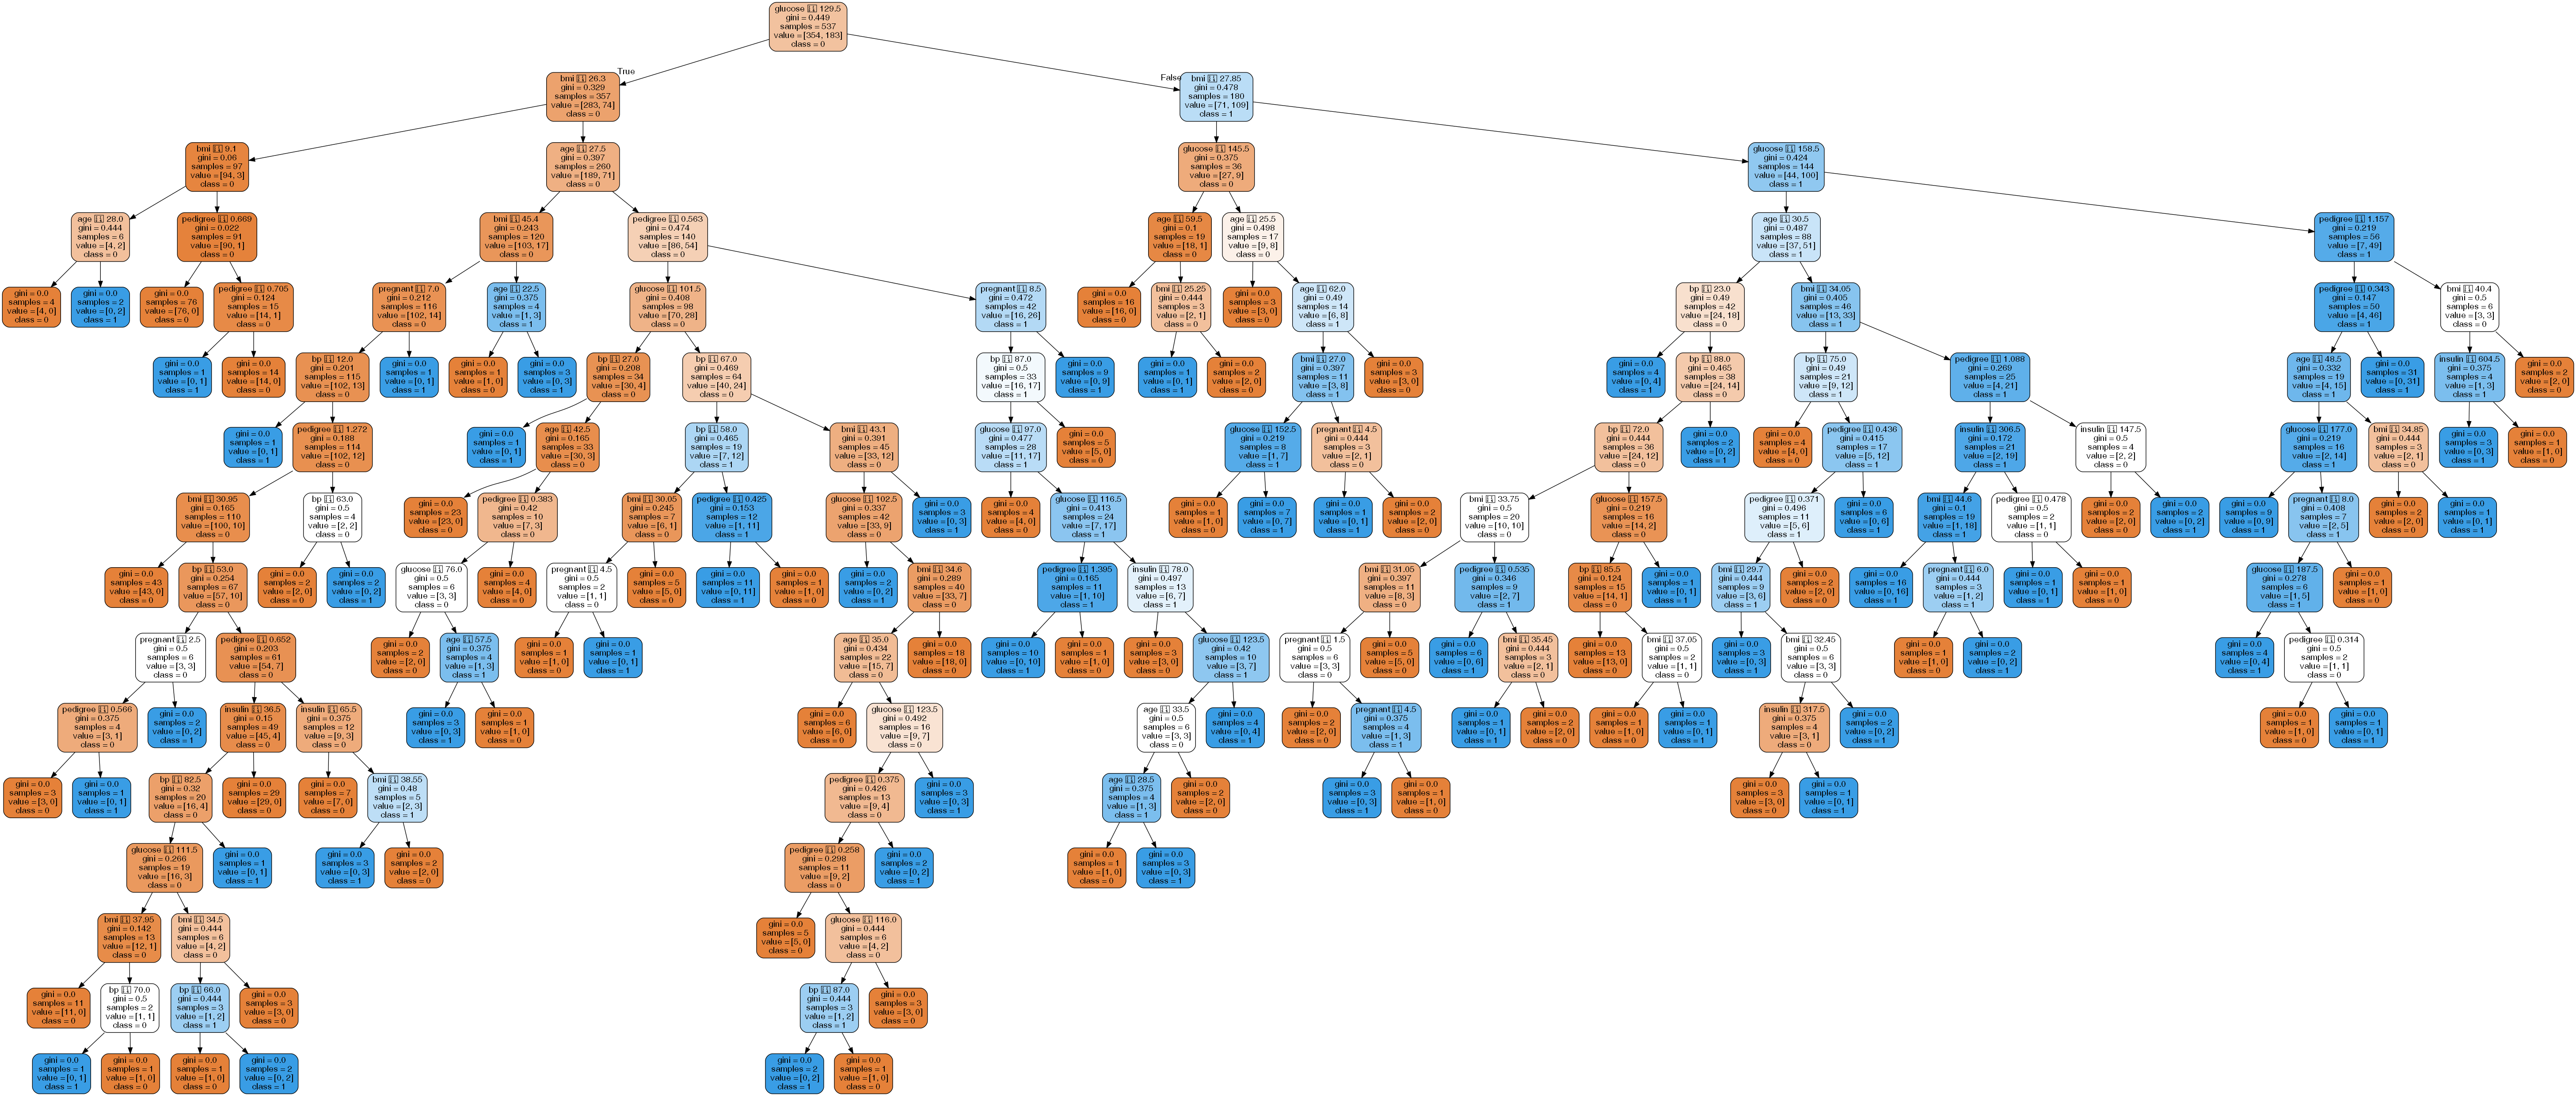

In [32]:
Image(graph.create_png())